**Проектная работа по модулю “Математика и статистика в Python”, PYDA-5**

**Задание:**

1.Загрузить файл hr.csv.

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

3.Рассчитать и визуализировать корреляционную матрицу для переменных.

4.Визуализировать несколько взаимосвязей между переменными.

5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

6.Рассчитать сколько работников работает в каждом департаменте.

7.Показать распределение сотрудников по зарплатам.

8.Показать распределение сотрудников по зарплатам совместно с департаментами.

9.Сколько сотрудников покинули компанию.

10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

**1. Загрузим csv-файл, посмотрим информацию о нем**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('HR.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**2. Рассчитаем основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

Воспользуемся иснтрументом profile_report

In [9]:
import pandas_profiling

In [11]:
df.profile_report()

Основные статистические показатели переменных приведены в описании Variables, на вкладке для каждой переменной Toggle details, закладка Statistics, Мода  может быть обнаружена на закладке Common values, первое значение (самое популярное).


**3. Рассчитаем и визуализиуем корреляционную матрицу для переменных.**

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Расситаем матрицу корреляций с помощьюе метода .corr. Метод нормализует данные.
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


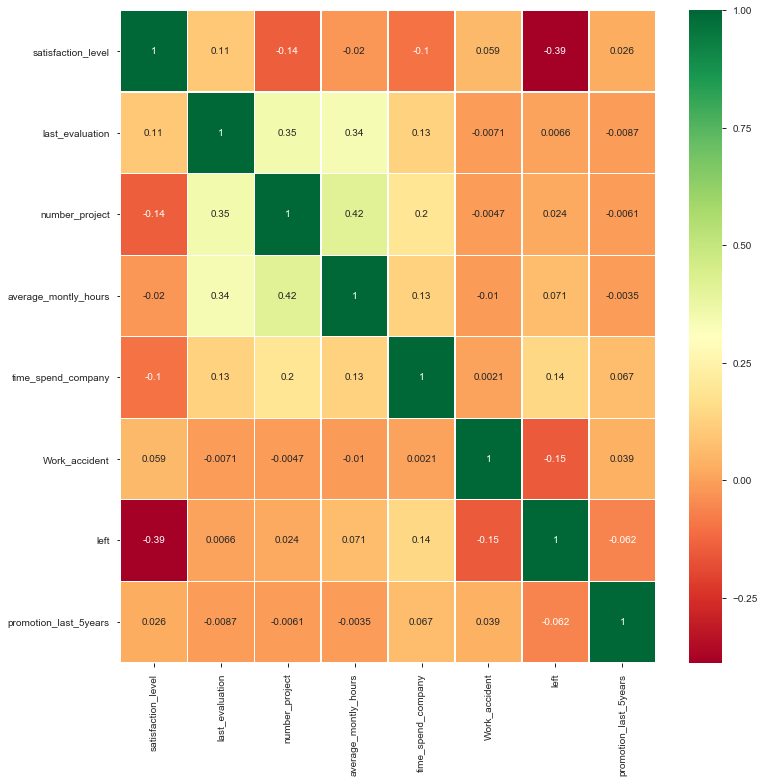

In [20]:
# Визуализируем матрицу корреляций.
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

**4. Визуализируем несколько взаимосвязей между переменными.**

In [32]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

Рассмотрим визуально взаимосвязи между некоторыми вещественными признаками:

last_evaluation - satisfaction_level

last_evaluation - average_montly_hours

average_montly_hours - satisfaction_level

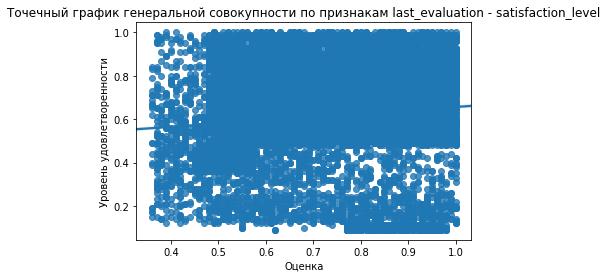

In [8]:
# last_evaluation - satisfaction_level
last_evaluation = df['last_evaluation']
satisfaction_level = df['satisfaction_level']
sns.regplot(x= last_evaluation, y=satisfaction_level,data=df, fit_reg=True)
plt.xlabel('Оценка')
plt.ylabel('Уровень удовлетворенности')
plt.title('Точечный график генеральной совокупности по признакам last_evaluation - satisfaction_level')
plt.show()

Видим (по регрессионной прямой), что зависимость между признаками (оценка и уровень удовлетовренности) слабая. Что подтверждается показателем корреляции между ними - 0,11

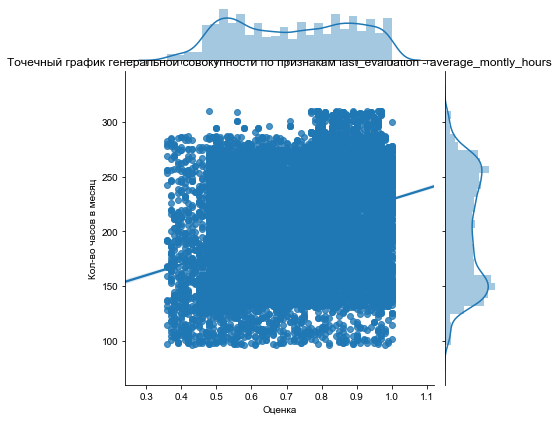

In [9]:
# ast_evaluation - average_montly_hours
average_montly_hours = df['average_montly_hours']
sns.jointplot(x= last_evaluation, y=average_montly_hours,data=df, kind='reg')
sns.set(style="white", color_codes=True)
plt.xlabel('Оценка')
plt.ylabel('Кол-во часов в месяц')
plt.title('Точечный график генеральной совокупности по признакам last_evaluation - average_montly_hours')
plt.show()

По регрессионной прямой видно, что взаимосвязь между данными (оценка и кол-во часов) сильнее, чем в первом случае (оценка и уровень удовлетовренности). Что подтверждается показателем корреляции между ними - 0,34

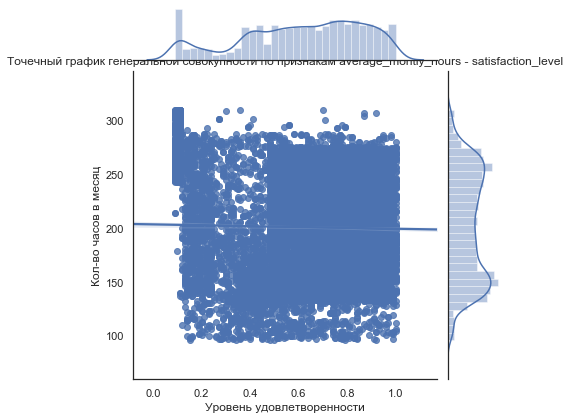

In [11]:
# average_montly_hours - satisfaction_level
sns.jointplot(x= satisfaction_level, y=average_montly_hours,data=df, kind='reg')
sns.set(style="white", color_codes=True)
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Кол-во часов в месяц')
plt.title('Точечный график генеральной совокупности по признакам average_montly_hours - satisfaction_level')
plt.show()

Никакой взаимосвязи между признаками (уровень удовлетворенности - количество часов) не наблюдаетсяю Что подтверждается показателем корреляции между ними - -0,02

Помотрим на взаимосвязь ушедших и оставшихся сотрудников и признака Уровень удовлетворенности

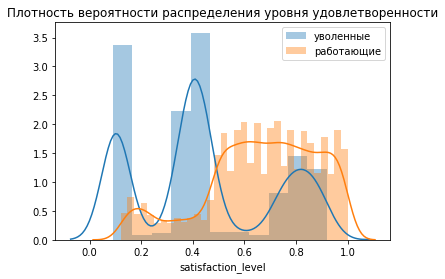

In [7]:
left_sat = df[df['left']==1]['satisfaction_level']
notleft_sat = df[df['left']==0]['satisfaction_level']
sns.distplot(left_sat)
sns.distplot(notleft_sat)
plt.title('Плотность вероятности распределения уровня удовлетворенности')
plt.legend(['уволенные', 'работающие'])
plt.show()

Из графика видно, что уволенные имеют уровень удовлетворенности ниже, чем работающие.

Помотрим на взаимосвязь ушедших и оставшихся сотрудников и признака Количество рабочих часов.

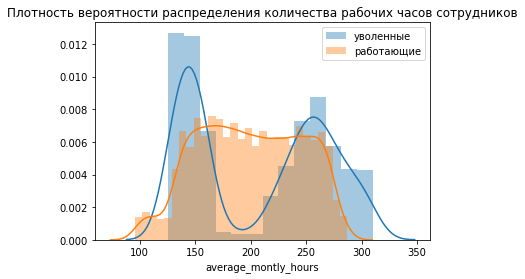

In [12]:
left_time = df[df['left']==1]['average_montly_hours']
notleft_time = df[df['left']==0]['average_montly_hours']

sns.distplot(left_time)
sns.distplot(notleft_time)
plt.title('Плотность вероятности распределения количества рабочих часов сотрудников')
plt.legend(['уволенные', 'работающие'])
plt.show()

Из графика видно, что увольняются в основоном сотрудники, у которых или достаточно мало рабочих часов в месяц или их достаточно много. При этом количество рабочих часов у работающих сотрудников стремится к нормальному распределению. Возможно, одной из причин увольнения является перекос в загрузке таких сотрудников.

Посмотрим на графике взаимосвязь ушедших и оставшихся сотрудников и признака Оценка.

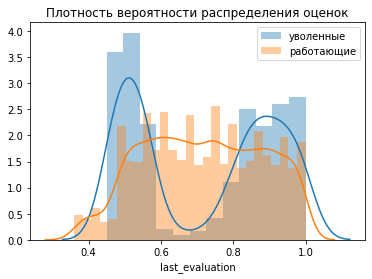

In [50]:
left_ev = df[df['left']==1]['last_evaluation']
notleft_ev = df[df['left']==0]['last_evaluation']
sns.distplot(left_ev)
sns.distplot(notleft_ev)
plt.title('Плотность вероятности распределения оценок')
plt.legend(['уволенные', 'работающие'])
plt.show()

Наблюдается аналогичный предыдущему перекос. Оценки работающих сотрудников стремятся к нормальному распределению. Оценки уволенных сотрудников либо малы, либо высоки (седло). Возможно этот перекос вляет на факт увольнения.

**5.С использованием t-test статистики проверим взаимосвязи между несколькими переменными.**

In [5]:
from scipy import stats
from scipy.stats import t

In [24]:
left_sat = df[df['left']==1]['satisfaction_level']
notleft_sat = df[df['left']==0]['satisfaction_level']
stats.ttest_ind(left_sat, notleft_sat)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

P-value равен нулю, меньше 0,05, поэтому мы отвергаем нулевую гипотезу. Между данными об уровне удовлетворенности уволенных и данными об уровне удовлетворенности оставшихся есть разница. 
Это подтверждает график выше - среднее показателя удовлетворенности у уволенных сильно отличается от среднего показателя удовлетворенности у оставшихся.

Проверим нулевую гипотезу на взаимосвязи двух признаков - уволенных сотрудников от количества рабочих часов и оставшихся сотрудников от количества рабочих часов.

In [25]:
left_time = df[df['left']==1]['average_montly_hours']
notleft_time = df[df['left']==0]['average_montly_hours']
stats.ttest_ind(left_time, notleft_time)

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

P-value больше 0,05 ,поэтому мы принимаем нулевую гипотезу и считаем, что выборки "Количество рабочих часов у уволенных" и "Количество рабочих часов у оставшихся" сопоставимы.
Это подтверждает график, построенный выше - среднее по колчеству рабочих часов для тех и для других сопоставимы (несмотря на то, что распределения количества часов разнве для этих групп).

Проверим взаимосвязь количества отработанных часов от уровня заработной платы

In [30]:
low = df[df['salary']=='low']['average_montly_hours']
medium = df[df['salary']=='medium']['average_montly_hours']
high = df[df['salary']=='high']['average_montly_hours']
stats.f_oneway(low, medium, high)

F_onewayResult(statistic=0.4583624407867663, pvalue=0.6323271153144614)

P-value больше 0,05, значит принимаем нулевую гипотезу - выборки сопоставимы. Таким образом, нет зависимости количества отработанных часов от уровня дохода.

Проверим взаимосвязь количества отработанных часов от уровня заработной платы

In [33]:
low = df[df['salary']=='low']['last_evaluation']
medium = df[df['salary']=='medium']['last_evaluation']
high = df[df['salary']=='high']['last_evaluation']
stats.f_oneway(low, medium, high)

F_onewayResult(statistic=3.1973320102081555, pvalue=0.04089896616654419)

P-value меньше 0,05, значит не принимаем нулевую гипотезу - выборки не сопоставимы. Считаем, есть определенная зависимость оценки сотрудника от уровня дохода.

**6.Рассчитаем, сколько работников работает в каждом департаменте.**

In [7]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

**7.Покажем распределение сотрудников по зарплатам.**

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

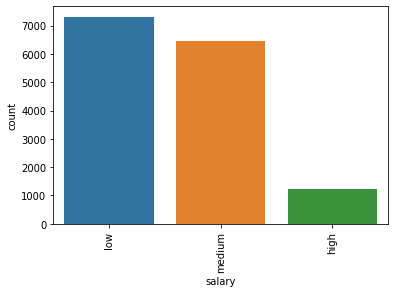

In [4]:
sns.countplot(x='salary', data=df)
plt.xticks(rotation=90)

**8.Покажем распределение сотрудников по зарплатам совместно с департаментами.**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

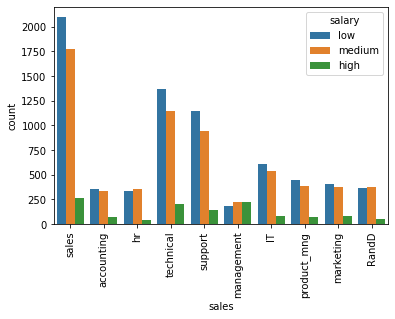

In [6]:
sns.countplot(x='sales', hue='salary', data=df)
plt.xticks(rotation=90)

**9.Сколько сотрудников покинули компанию.**

In [7]:
print('Покинуло компанию', len(df[df['left']==1]), 'сотрудников из', len(df))

Покинуло компанию 3571 сотрудников из 14999


**10.Проверим несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

10.1. Выше с помщью t-теста было определено, что есть зависимость ухода сотрудников от уровня удовлетворенности. Чем ниже уровень удовлетворенности сотрудника, тем выше вероятность, что он покинет компанию.

10.2. С помощью критерия Манна-Уитни определим, ест ли зависимость ухода сотрудников от уровня их дохода.

In [8]:
low = df[df['salary']=='low']['left']
medium = df[df['salary']=='medium']['left']
high = df[df['salary']=='high']['left']
u, p_value = stats.mannwhitneyu(low, medium, high)
p_value[0]

6.478441511630743e-36

P-value много меньше 0,05, поэтому не принимаем нулевую гипотезу. Нет зависимости ухода сотрудников от уровня их дохода.

10.3. Используем модель случайного леса для поиска наиболее важных для модели атрибутов. Эти признаки будут наиболее сильно влять на таргет (left)

Дерево решений позволяет работать с несбалансированными категориальными данными, поэтому дополнительной подготовки датасета не требуется.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Приводим категориальные данные в числовые (sales и salary)

In [29]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [30]:
def sales_n(a):
    if a == 'sales':
        return 1
    elif a == 'accounting':
        return 2
    elif a == 'hr':
        return 3
    elif a == 'technical':
        return 4
    elif a == 'support':
        return 5
    elif a == 'management':
        return 6
    elif a == 'IT':
        return 7
    elif a == 'product_mng':
        return 8
    elif a == 'marketing':
        return 9
    elif a == 'RandD':
        return 10

In [36]:
def salary_n(a):
    if a == 'low':
        return 1
    elif a == 'medium':
        return 2
    elif a == 'high':
        return 3

In [41]:
df_1 = df
df_1['sales_n'] = df['sales'].apply(sales_n)
df_1['salary_n'] = df['salary'].apply(salary_n)
drop_coloms_1 = ['sales', 'salary']
df_1.drop(drop_coloms_1, axis=1, inplace = True)
df_1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_n,salary_n
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


In [42]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales_n                  14999 non-null int64
salary_n                 14999 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [43]:
X = df_1.drop('left', axis=1)
y = df_1.left

In [44]:
# разделим полученный датасет на тренировочный 80% и тестовый 20%

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [45]:
# создаем модель деревья решений
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

In [47]:
model.score(X_test, y_test)

0.9936666666666667

Точность предсказания модели очень высока. Теперь найдем наиболее значимые атрибуты для модели.

No handles with labels found to put in legend.


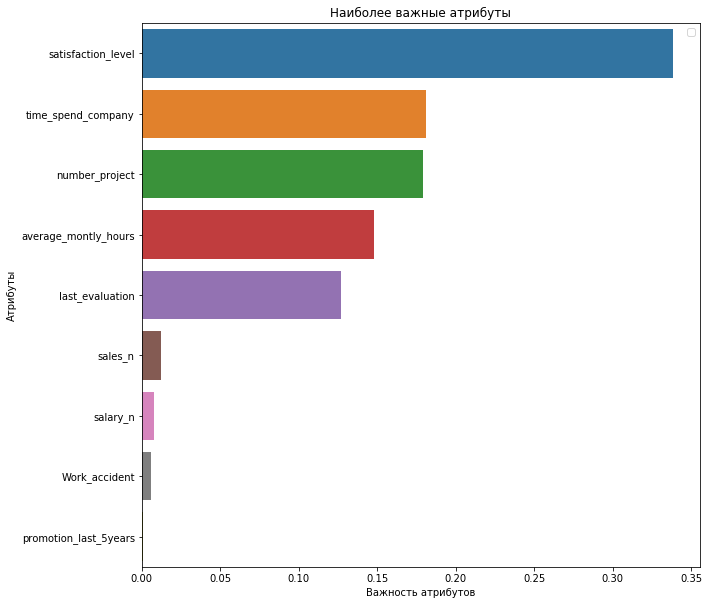

In [46]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

- Наибольшее влияние на уход сотрудников оказывет уровень их удовлетворенности в компании (в т.ч. смотрите п.10.1)

Также сильное вляние оказывают параметры: 

- количество времени, проведенное в компании, 

- количество проектов, 

- среднее количество часов, отрабатываемых в месяц, (выше мы видели, что у уволенных сотрудников распределение рабочего времени сильно перекошено к минимуму и максимуму - седло - в отличие отработающих сотрудников, у которых распределение раюочего времени стремится к нормальному. Необходимо обращать внимание на загрузку сотруднико и приводить ее к средним показателям без перекосов (равномерно распределять по сотрудникам).

- оценка сотрудника (аналогично среднему количеству часов, график приведен выше)

10.4 Посмотрим с помощью визуализации, как именно влияет проведенное в компании количетсво времени на уход сотрудников.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

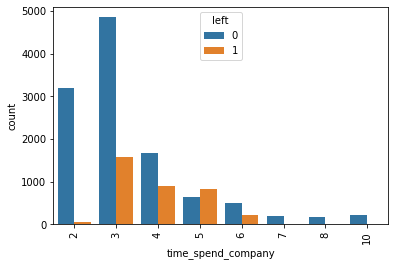

In [55]:
sns.countplot(x='time_spend_company', hue='left', data=df)
plt.xticks(rotation=90)

Из графика видно, что наиболее кризисными с точки зрения увольнения из компании является четвертый-шестой годы работы. На пеятом нгоду работы, мы видим, по статистике увольняется больше человек,  чем остается.

10.5. Посмотрим с помощью визуализации, как именно влияет количество проектов на уход сотрудников.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

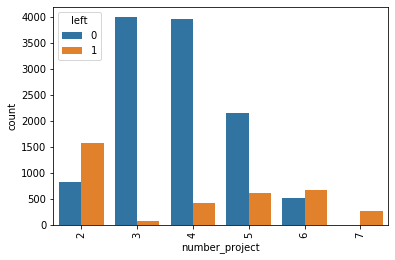

In [57]:
sns.countplot(x='number_project', hue='left', data=df)
plt.xticks(rotation=90)

Здесь ситуация похожа на ситуацию с загрузкой сотрудников по часам (и неудивительно, т.к. признаки количество проектов и среднее кодичество отработанных часов в месяц несильно, но коррелируют между собой (0,42). 
Если сотрудник недозагружен или перегружен проектами, увеличивается вероятность, что он уволится/будет уволен.